Q1:Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pyplot



import dataset

In [44]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (2).csv


In [45]:
data=pd.read_csv("delivery_time.csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
data.shape

(21, 2)

In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [9]:
data.nunique()

Delivery Time    21
Sorting Time      9
dtype: int64

In [10]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<ipython-input-11-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

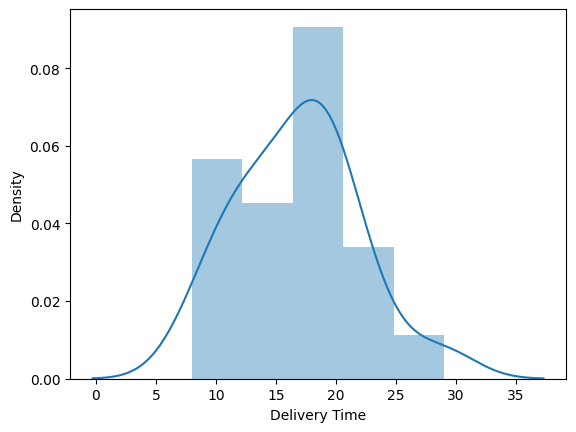

In [11]:
sns.distplot(data['Delivery Time'])

<ipython-input-12-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

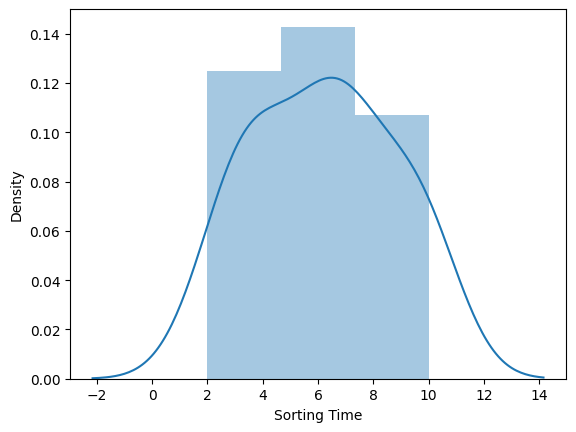

In [12]:
sns.distplot(data['Sorting Time'])

In [46]:
#renaming the columns
data=data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)

In [14]:
data

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
#Correlation Analysis
data.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


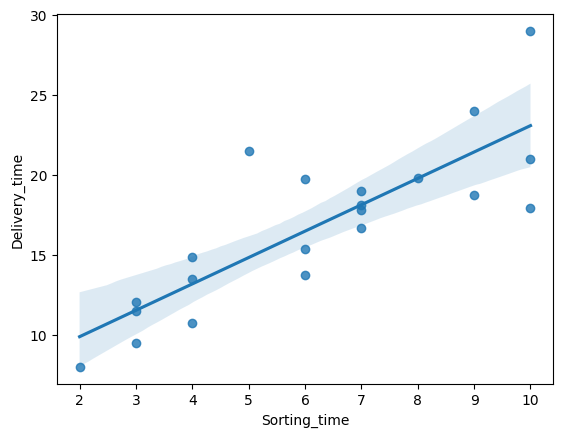

In [17]:
sns.regplot(x = "Sorting_time", y = "Delivery_time" , data=data);

# Transformation (log)

In [19]:
data[['Delivery_time','Sorting_time']] = np.log(data[['Delivery_time','Sorting_time']])
data[['Delivery_time','Sorting_time']]

,Delivery_time,Sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


# Fitting a Simple Linear Regression Model

# Model Building

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data = data).fit()

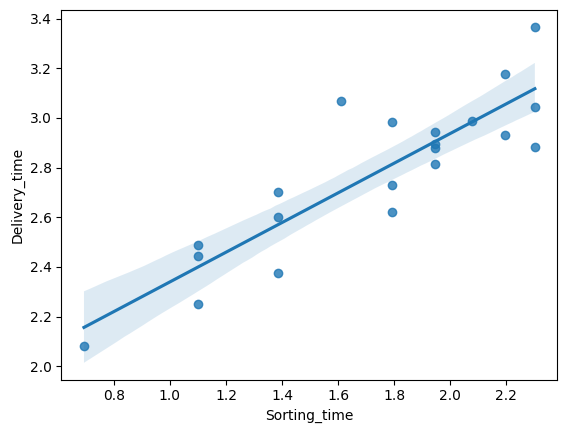

In [22]:
sns.regplot(x = "Sorting_time", y = "Delivery_time" , data=data);

# model testing

In [23]:
#coefficient parameters
model.params

Intercept       1.741987
Sorting_time    0.597522
dtype: float64

In [24]:
#Finding Rsquared values
model.rsquared,model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

Model Predictions

In [26]:

#Predict for 5 and 10 sorted_time
newdata=pd.Series([5,10])

In [27]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,10


In [28]:
model.predict(data_pred)

0    4.729599
1    7.717210
dtype: float64

# Transformation(square root)

In [33]:
data[['Delivery_time','Sorting_time']] = np.sqrt(data[['Delivery_time','Sorting_time']])
data[['Delivery_time','Sorting_time']]

,Delivery_time,Sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


# model building

In [36]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=data).fit()

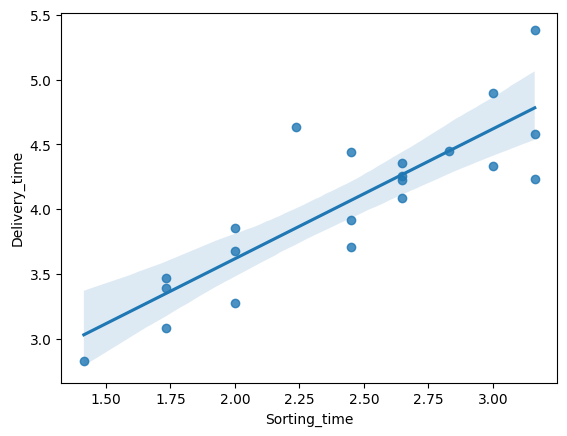

In [38]:
sns.regplot(x = "Sorting_time", y = "Delivery_time" , data=data);

# model testing

In [39]:
#coefficient parameters
model.params

Intercept       1.613479
Sorting_time    1.002217
dtype: float64

In [40]:
#Finding Rsquared values
model.rsquared,model.rsquared_adj

(0.7292011987544665, 0.7149486302678596)

In [41]:
# Automatic Prediction for say sorting time 5,10
new_data=pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [42]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,10


In [43]:
model.predict(data_pred)

0     6.624563
1    11.635647
dtype: float64

# Transformation(cube root)

In [47]:
data[['Delivery_time','Sorting_time']] = np.cbrt(data[['Delivery_time','Sorting_time']])
data[['Delivery_time','Sorting_time']]

,Delivery_time,Sorting_time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435
5,2.485246,1.817121
6,2.668402,1.912931
7,2.117912,1.442250
8,2.615879,2.154435
9,2.656646,2.080084


# model building

In [51]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=data).fit()

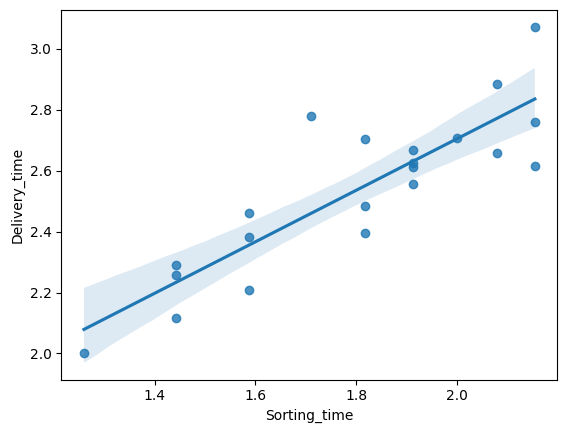

In [52]:
sns.regplot(x = "Sorting_time", y = "Delivery_time" , data=data);

# model testing

In [53]:
#coefficient parameters
model.params

Intercept       1.013571
Sorting_time    0.845585
dtype: float64

In [54]:
#Finding Rsquared values
model.rsquared,model.rsquared_adj

(0.7441167577566266, 0.7306492186911859)

In [55]:
# Automatic Prediction for say sorting time 5,10
new_data=pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [56]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,10


In [57]:
model.predict(data_pred)

0    5.241495
1    9.469419
dtype: float64